<a href="https://colab.research.google.com/github/Kuensha/MyRepo/blob/master/Workshop_Time_Series_Parte_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

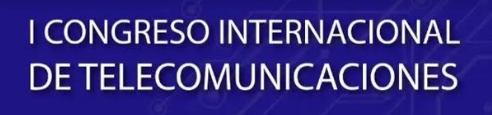

---
**PARA REALIZAR TAREAS MAS COMPLEJAS, DEBEMOS TRABAJAR CON VARIOS MODULOS EXTERNOS**

---




---


**PASO 1 ) IMPORTAMOS LOS MÓDULOS QUE VAMOS A UTILIZAR**


---



In [0]:
import pandas as pd   # herramienta de manipulación de datos
import numpy as np   # Biblioteca de funciones matematicas de alto nivel
import matplotlib.pyplot as plt  # Biblioteca para visualizacion de datos
import seaborn as sns  # Otra Biblioteca para visualizacion de datos --> basada en matplotlib



---


**PASO 2 ) SETEAMOS GOOGLE DRIVE PARA LEER LOS ARCHIVOS**


---




In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



---


**DESDE GOOGLE DRIVE, ELEGIMOS LOS ARCHIVOS Y HABILITAMOS LA OPCIÓN DE OBTENER LINK PARA COMPARTIR.**


---


**POSTERIORMENTE COPIAMOS TODOS LOS NÚMEROS Y LETRAS QUE ESTÁN DESPUES DE LA PALABRA ID EN LOS LINKS COMPARTIDOS DESDE GOOGLE DRIVE**


---



In [0]:
# PLETISMOGRAFIA
plet_code = 'agregar codigo'
# PRESION ARTERIAL
pres_code = 'agregar codigo'
# ID Y ESTADO DEL PACIENTE
state_code = 'agregar codigo'
# PARAMETROS MORFOLOGICOS
morf_code = 'agregar codigo'



---

**ALMACENAMOS TODOS NUESTROS DATOS EN DATAFRAMES**


---



In [0]:
# GUARDAMOS DATOS DE PLETISMOGRAFIA EN UN DATAFRAME
downloaded = drive.CreateFile({'id':plet_code}) 
downloaded.GetContentFile('Pletis.csv')  

Pletis = pd.read_csv('Pletis.csv',sep=';')  # LEER UN ARCHIVO CSV CON PANDAS


# GUARDAMOS DATOS DE PRESION EN UN DATAFRAME
downloaded = drive.CreateFile({'id':pres_code}) 
downloaded.GetContentFile('Presion.csv')  

Presion = pd.read_csv('Presion.csv', sep=';')  # LEER UN ARCHIVO CSV CON PANDAS


# GUARDAMOS EL ID Y EL ESTADO DE LOS PACIENTES EN UN DATAFRAME
downloaded = drive.CreateFile({'id':state_code}) 
downloaded.GetContentFile('EstadoPaciente.txt')  

EstadoPaciente = pd.read_csv('EstadoPaciente.txt',names=['Paciente', 'Estado'])  # LEER UN ARCHIVO CSV CON PANDAS


# GUARDAMOS DATOS MORFOLOGICOS EN UN DATAFRAME
downloaded = drive.CreateFile({'id':morf_code}) 
downloaded.GetContentFile('Morfologia.txt')  


Morfologia = pd.read_csv('Morfologia.txt', names=['X', 'Y', 'XT', 'FT_PERC', 'ANG_INV', 'VM', 'A80'])   # LEER UN ARCHIVO CSV CON PANDAS
# AGREGO LA INFORMACION DEL NUMERO DE PACIENTE Y DEL ESTADO DEL PACIENTE AL DATAFRAME DE FEATURES
Morfologia['Paciente'] = EstadoPaciente['Paciente']
Morfologia['Estado'] = EstadoPaciente['Estado']



---


**CADA FILA DEL DATAFRAME *PLETIS* ES UNA CURVA DE PLETISMOGRAFÍA**


---
SIEMPRE ES NECESARIO CONOCER EL DATASET CON EL QUE SE ESTA TRABAJANDO. EN EL CASO BAJO ESTUDIO, EXISTEN DOS PROBLEMAS CONOCIDOS.

1) AL IMPORTAR LOS DATOS CON PANDAS, EL PRIMER VALOR TIENE UN INDEX LLAMADO
"Unnamed" QUE INDICA EL NUMERO DE CURVA QUE SE ESTA GRAFICANDO. ESTE VALOR GENERA UN PROBLEMA A LA HORA DE GRAFICAR EL DATAFRAME

2) ES NECESARIO ELIMINAR LOS CEROS AL FINAL DE CADA COLUMNA.


---




In [0]:
# VISUALIZACION DE LOS PRIMEROS 5 VALORES DE UNA CURVA. UTILIZO EL METODO ILOC PARA 
# INDEXAR UNA COLUMNA POR SU NUMERO EN LUGAR DE POR SU NOMBRE
# PUEDE VERSE EL PRIMER INDICE LLAMADO UNNAMED
print(Pletis.iloc[25].head())
# VISUALIZACION DE LOS ULTIMOS 5 DATOS.
print(Pletis.iloc[25].tail())



---


**ELIMINACION DE CEROS Y FILAS INDESEADAS**

---




In [0]:
pt = Pletis.iloc[25]
# GRAFICAMOS LA CURVA SIN ELIMINAR LOS CEROS DEL FINAL Y SIN ELIMINAR LA PRIMER CURVA
plt.figure(1, figsize=(3,3))
plt.plot(pt)
plt.title("Dataframe sin eliminar trailing zeros y sin elimnar unnamed index ")

In [0]:
# ELIMINAMOS LOS CEROS DEL FINAL
pt = np.trim_zeros(Pletis.iloc[25])

# GRAFICAMOS LA CURVA ELIMINANDO LOS CEROS DEL FINAL Y SIN ELIMINAR PRIMER DATO
plt.figure(2, figsize=(3,3))
plt.plot(pt)
plt.title("Dataframe eliminando trailing zeros y sin eliminar unnamed index ")


In [0]:
# ELIMINAMOS EL INDICE LLAMADO UNNAMED
pt = pt.loc[~pt.index.str.match('Unnamed')]

# GRAFICAMOS LA CURVA ELIMINANDO LOS CEROS Y EL INDICE INDESEADO
plt.figure(3, figsize=(3,3))
plt.plot(pt)
plt.title("Dataframe eliminando trailing zeros y unnamed index ")
plt.show()

---
**AUTOMATIZACION DEL PROCESO**

---


In [0]:
# DEFINIMOS UNA FUNCION PARA AUTOMATIZAR EL PROCESO
def deleteZerosAndFirstIndex(df, n):
    pt = np.trim_zeros(df.iloc[n])
    pt = pt.loc[~pt.index.str.match('Unnamed')]
    return pt

In [0]:
# APLICAMOS LA FUNCION
df1 = deleteZerosAndFirstIndex(Pletis, 25)
plt.figure()
plt.plot(df1)
plt.show()

---
# RECONOCIMIENTO DE PATRONES

---
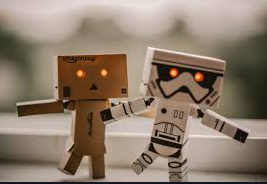

---
**PARA CADA UNA DE LAS CURVAS DE PLETISMOGRAFÍA OBTENGO CIERTOS PARAMETROS
RELACIONADOS CON LA MORFOLOGIA DE LA SEÑAL**

---
LOS PARAMETROS QUE EXTRAIGO SON LOS SIGUIENTES:

*   **X** = posición del máximo
*   **Y** = altura del máximo
*   **XT** = cantidad de puntos de la señal (período de la señal)
*   **FT_PERC** = X/XT --> Relación entre la posición del máximo y la cantidad total de puntos
*   **COTG(BETA)** = X/Y
*   **VM** = Valor medio
*   **A80** = Ancho al 80% del máximo

---


---
**PARA OPTIMIZAR EL TIEMPO DEL WORKSHOP, VAMOS A TRABAJAR CON UN DATASET DONDE PREVIAMENTE SE EXTRAJERON TODOS ESTOS PARÁMETROS DE LAS MÁS DE 6000 SEÑALES.**

---

In [0]:
Morfologia.head().style

---
**ALGORITMOS DE CLASIFICACIÓN:**
EN APRENDIZAJE AUTOMÁTICO (A.K.A MACHINE LEARNING) Y EN ESTADÍSTICA, LA CLASIFICACIÓN ES UN ENFOQUE DE APRENDIZAJE SUPERVISADO EN EL CUAL EL PROGRAMA APRENDE DE OBSERVACIONES PASADAS PREVIAMENTE ETIQUETADAS, CON EL OBJETIVO DE LOGRAR PREDECIR LA CATEGORIA A LA CUAL PERTENECE UNA NUEVA OBSERVACIÓN

EXISTEN DOS TIPOS DE CLASIFICADORES:

*   CLASIFICADORES BINARIOS
*   **CLASIFICADORES MULTICLASE**

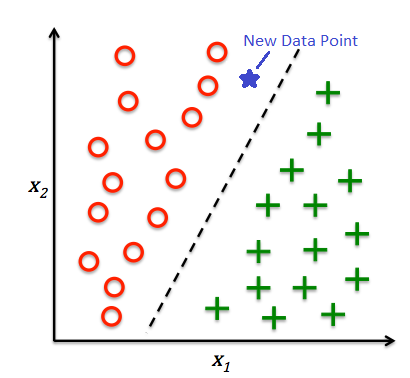


EN LA FIGURA SUPERIOR, TANTO LAS CRUCES VERDES COMO LOS CÍRCULOS ROJOS SON EL CONJUNTO DE ENTRENAMIENTO (DATOS ETIQUETADOS), Y LA PEQUEÑA ESTRELLA AZUL ES LA NUEVA OCURRENCIA QUE DEBE SER CLASIFICADA.


---


--- 
**MANOS A LA OBRA!! VAMOS A ARMAR NUESTRO PROPIO PROBLEMA DE CLASIFICACIÓN**

---

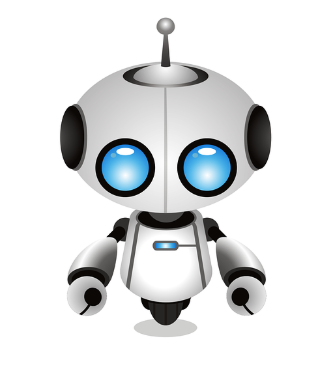

**QUE SABEMOS DE NUESTRO PROBLEMA?**

DISPONEMOS DE UN DATASET COMPUESTO POR 480 DATOS ETIQUETADOS.
ESTE DATASET ESTÁ FORMADO POR FEATURES EXTRAIDAS DE CURVAS DE PLETISMOGRAFÍA PREVIAMENTE SEGMENTADAS, Y ETIQUEDATAS EN BASE A LA PRESIÓN ARTERIAL DEL PACIENTE.

LAS 3 CLASES A LAS QUE PUEDE PERTENECER UN DATO SON:


*   CLASE 1: PACIENTE HIPERTENSO (PAS > 140)
*   CLASE 2: PACIENTE NORMOTENSO (90 <= PAS <= 140)
*   CLASE 3: PACIENTE HIPOTENSO (PAS < 90)

---

In [0]:
# ME QUEDO CON LOS DATOS DEL PACIENTE 11
P11 = Morfologia.loc[Morfologia["Paciente"]==11]
P11.reset_index(inplace=True, drop=True)
# P11.describe()

# CONTAMOS LA CANTIDAD DE DATOS DE CADA CLASE (ESTADO)
print("Cantidad de datos de cada clase")
print(P11['Estado'].value_counts())



---
NUESTRO PROBLEMA DE CLASIFICACIÓN VA A ESTAR FORMADO POR 2 DATAFRAMES (VECTORES O MATRICES)
X = DATAFRAME QUE CONTIENE LAS FEATURES (CARACTERÍSTICAS)
T = SERIE QUE CONTIENE LAS ETIQUETAS (1,2 Ó 3)

---
*   SI TENEMOS 480 DATOS CON 7 CARACTERÍSTICAS CADA UNO, EL DATAFRAME X SERÁ DE DIMENSIONES (480, 7) --> 480 FILAS Y 7 COLUMNAS
*   LA SERIE T TENDRA UNA LONGITUD DE 480

---
**ESTOS DATOS (X, T) VAMOS A DIVIDIRLOS EN DOS CONJUNTOS.**


*   CONJUNTO DE ENTRANAMIENTO (TRAIN) --> CONJUNTO ETIQUETADO PARA ENTRENAR EL MODELO
*   CONJUNTO DE EVALUACIÓN (TEST) --> CONJUNTO "NUEVO", DEBEMOS PREDECIR SU ETIQUETA

---
**PROBLEMA:**

ESTE DATASET TIENE LAS CLASES DESBALANCEADAS.
NECESITAMOS BALANCEAR LOS DATOS ANTES DE PODER DIVIDIRLOS

---

In [0]:
# PARA ENTRENAR CUALQUIER TIPO DE CLASIFICADOR NECESITAMOS QUE LOS DATOS ESTEN BALANCEADOS
# NO VAMOS A RECURRIR A NINGUN ARDID ELABORADO
# NOS VAMOS A QUEDAR CON 118 DATOS DE CADA CLASE

# RECORDAR CON LOC PODEMOS ACCEDER A UN GRUPO DE FILAS Y/O COLUMNAS POR NOMBRE, 
# PERO TAMBIÉN ES POSIBLE UTILIZARLO PARA TRABAJAR CON ARRAYS BOOLEANOS
P11_C1 = P11.loc[P11["Estado"]==1]
P11_C2 = P11.loc[P11["Estado"]==2]
P11_C3 = P11.loc[P11["Estado"]==3]

# RESETEAMOS EL INDICE DE CADA UNO DE LOS NUEVOS DATAFRAME
P11_C1.reset_index(drop=True, inplace=True)
P11_C2.reset_index(drop=True, inplace=True)
P11_C3.reset_index(drop=True, inplace=True)

# CON LA OPCION SAMPLE, DESORDENAMOS NUETROS DATOS
P11_C1.sample(frac=1).reset_index(drop=True)
P11_C2.sample(frac=1).reset_index(drop=True)
P11_C3.sample(frac=1).reset_index(drop=True)

# ARMAMOS UN NUEVO CONJUNTO CON 118 DATOS DE CADA CLASE
P11_new = pd.concat([P11_C1,P11_C2.iloc[:118,:],P11_C3.iloc[:118,:]], axis=0)

# NUEVAMENTE DESORDENAMOS EL DATAFRAME
P11_new = P11_new.sample(frac=1).reset_index(drop=True)




---
**AHORA SI!! YA TENEMOS NUESTRO CONJUNTO DE DATOS BALANCEADO**

---

YA PODEMOS PROCEDER A DIVIDIR NUESTROS DATOS EN ENTRENAMIENTO Y TESTEO

PARA ESTO VAMOS A UTILIZAR UNA LIBRERIA DE MACHINE LEARNING MUY FAMOSA DE PYTHON --> SCI-KIT LEARN, ABREVIADA COMO SKLEARN


In [0]:
# SKLEARN ES UNA LIBRERIA ENORME. NO VAMOS A IMPORTARLA TODA. SOLO LO NECESARIO
from sklearn.model_selection import train_test_split

# GENERAMOS EL VECTOR DE ETIQUETAS
y = P11_new.pop('Estado')
P11_new.pop("Paciente")
# GENERAMOS LA MATRIZ DE CARACTERÍSTICAS
X = P11_new

# SEPARO LOS DATOS EN TEST Y TRAIN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



---
EN CLASIFICACIÓN, LOS DATOS DEBEN O BIEN NORMALIZARSE, O BIEN ESTANDARIZARSE

VAMOS A ESTANDARIZAR LOS DATOS (MEDIA CERO Y VARIANZA UNITARIA)

---

In [0]:
# SKLEARN TIENE UN ESTANDARIZADOR
from sklearn.preprocessing import StandardScaler

 # PERO NECESITA QUE TODOS SUS DATOS SEAN DEL TIPO FLOAT
 # VAMOS A CHEQUAR QUE TODOS LOS DATOS SEAN FLOTANTES
print("Muestro el tipo de las columnas")
print(X_train.dtypes)

# NO LO SON, ASI QUE VAMOS A HACER UN CASTEO DE ESTOS DATOS
X_train = X_train.astype({"X": float, "XT": float,"A80":float})
print("Muestro el tipo de las columnas luego del cast")
print(X_train.dtypes)

# GENERO UN SCALER
scaler = StandardScaler()
# "ENTRENAMOS" EL SCALER CON LOS DATOS DE ENTRENAMIENTO
scaler.fit(X_train)
# FINALMENTE, APLICAMOS LA ESTANDARIZACIÓN TANTO A LOS DATOS DE ENTRENAMIENTO
# COMO A LOS DE TESTEO
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



---
**YA ESTAMOS EN CONDICIONES DE ENTRENAR NUESTRO PRIMER CLASIFICADOR**

--- 
ACTUALMENTE EXISTEN INFINIDAD DE CLASIFICADORES. POR CUESTIONES DE TIEMPO, HOY SÓLO VAMOS A UTILIZAR UNO

---

**REDES NEURONALES ARTIFICIALES (ANN)**

LAS REDES NEURONALES SON REDES DE NEURONAS DE MÚLTIPLES CAPAS QUE SE UTILIZAN PARA CLASIFICAR COSAS, HACER PREDICCIONES, ETC.

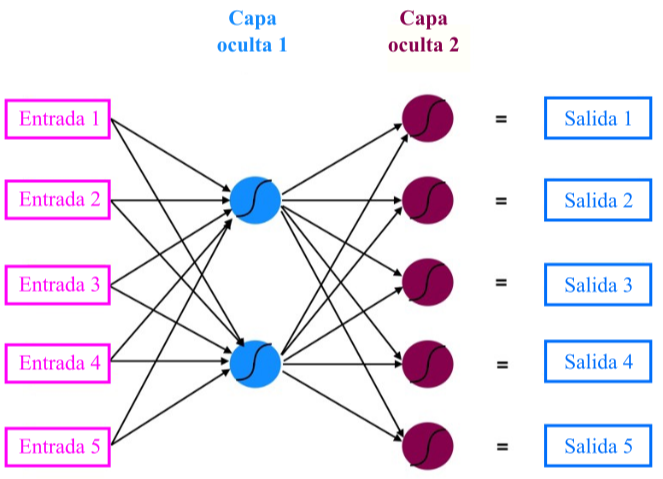

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ARMAMOS EL CLASIFICADOR
# El solver adam funciona mejor con grandes volúmenes de datos
my_solver='lbfgs'
if my_solver == 'adam':
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15, 15),
                        activation='tanh', max_iter=1000, early_stopping=True,
                        validation_fraction=0.20, n_iter_no_change=6,
                        verbose=True, warm_start = True, random_state=0)
elif my_solver == 'sgd':
    clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(15, 15),
                        activation='tanh', max_iter=1000, early_stopping=True,
                        validation_fraction=0.20, n_iter_no_change=6,
                        verbose=True, warm_start = True,random_state=0)
else:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 15),
                        activation='tanh', max_iter=1000, early_stopping=True,
                        validation_fraction=0.20, n_iter_no_change=6,
                        verbose=True, warm_start = True,random_state=0)


print("algo")
# ENTRENAMOS EL CLASIFICADOR
clf.fit(X_train, y_train)

# REALIZAMOS LAS PREDICCIONES SOBRE EL CONJUNTO DE TEST
predictions = clf.predict(X_test)


In [0]:
# POR ÚLTIMO, VEMOS QUE TAN EFECTIVO ES EL CLASIFICADOR QUE ACABAMOS DE ENTRENAR
# import itertools

# EVALUAMOS EL DESEMPEÑO DEL CLASIFICADOR MEDIANTE LA MATRIZ DE CONFUSIÓN
conf_mat = confusion_matrix(y_test, predictions)
# NORMALIZAMOS LA MATRIZ DE CONFUSIÓN
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("Performance for Neural Network Classifier")
print(conf_mat)
print(classification_report(y_test, predictions))





